In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

# print(sys.path)

import networkx as nx

from graphPlot import drawGraph, SIZE
from const import *

plt.rcParams['figure.figsize'] = SIZE
# print(plt.rcParams['figure.figsize'])

# **ConvNet Abstraction**

## *TDLS Feb 11. 2019*

## Chris Dryden

- [missing]

## Peng Cheng

- pc175@uowmail.edu.au

- datapassports.com

- github.com/tribbloid

## **Overview**

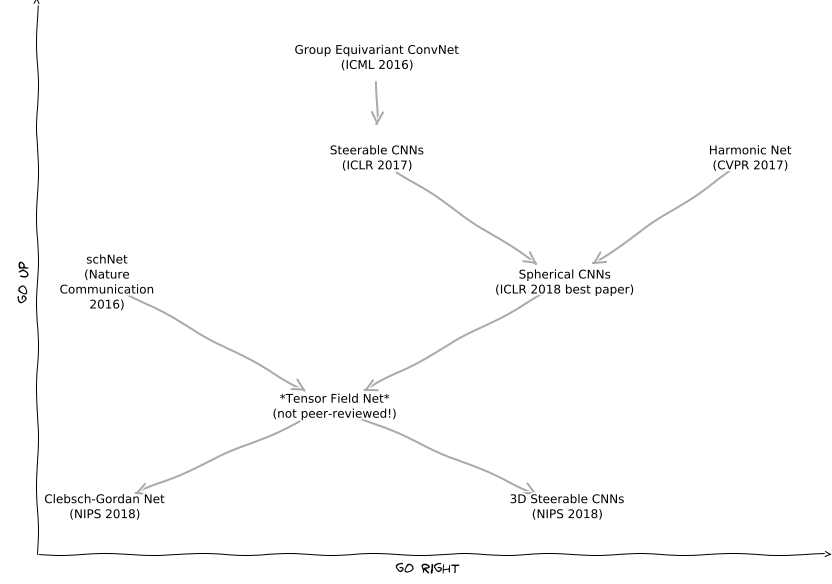

In [19]:

g = nx.DiGraph(directed=True)

schNet = "schNet\n(Nature\nCommunication\n2016)"
groupInv = "Group Equivariant ConvNet\n(ICML 2016)"
steerable = "Steerable CNNs\n(ICLR 2017)"
harmonic = "Harmonic Net\n(CVPR 2017)"
spherical = "Spherical CNNs\n(ICLR 2018 best paper)"
tensorField = "*Tensor Field Net*\n(not peer-reviewed!)"
cgNet = "Clebsch-Gordan Net\n(NIPS 2018)"
threeDSteerable = "3D Steerable CNNs\n(NIPS 2018)"

g.add_edge(schNet, tensorField)
g.add_edge(groupInv, steerable)
g.add_edge(harmonic, spherical)
g.add_edge(steerable, spherical)
g.add_edge(spherical, tensorField)
g.add_edge(tensorField, cgNet)
g.add_edge(tensorField, threeDSteerable)

drawGraph(g)

plt.show()

## Pre-ConvNet

1960-1987

[Eternal winter covers the land]

## Pre-ConvNet - Linear/Fully Connected/~~Dense/Perceptron~~ Layer

In pursuing of unbounded representation power

[avoid bra-ket and /int symbol at all cost]


\begin{align}
& \text{($w$: weight of neurons)} & f_+(y) = \Phi \Big( f(x) \Big) &= \phi \Big( \int\limits_{x \in \text{domain}} f(x) w(x, y) dx \Big) \\
& \text{(pardon the abusing of notation)} & &= \phi \Big( < f(x), w(x, y) >_x \Big)
\end{align}

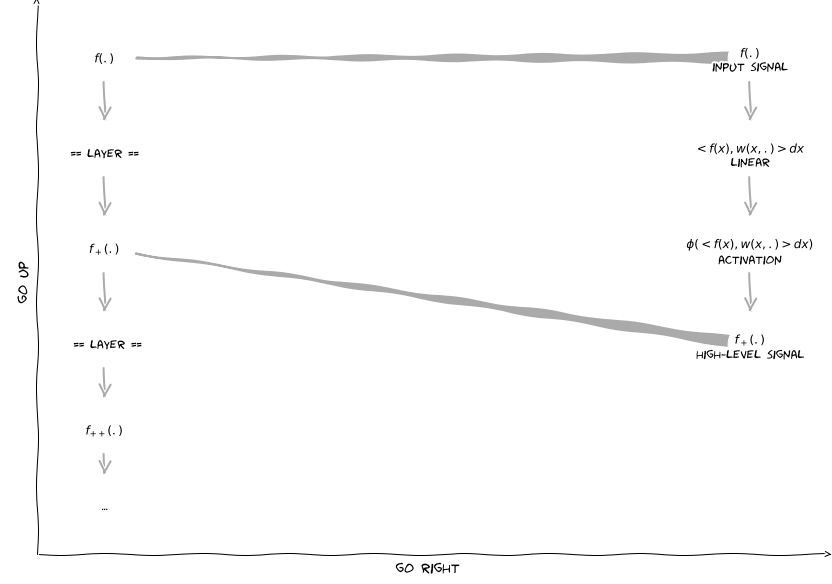

In [18]:


g = nx.DiGraph(directed=True)

g.add_edge("$f(.)$", "== layer ==")
g.add_edge("== layer ==", "$f_+(.)$")
g.add_edge("$f_+(.)$", " == layer ==")
g.add_edge(" == layer ==", "$f_{++}(.)$")
g.add_edge("$f_{++}(.)$", "...")

dot = "$f(.)$\ninput signal"
fc = "$<f(x), w(x, .)> d x$\nlinear"
nl = "$\phi(<f(x), w(x, .)> d x)$\nactivation"
dot2 = "$f_+(.)$\nhigh-level signal"
# hw = "highway?"

g.add_edge(dot, fc)
g.add_edge(fc, nl)
g.add_edge(nl, dot2)

g2 = g.copy()

g2.add_edge(dot, "$f(.)$", wedge=True)
g2.add_edge(dot2, "$f_+(.)$", wedge=True)

drawGraph(g2, g, font_family='humor sans')

plt.show()

## Pre-ConvNet - Linear/Fully Connected/~~Dense/Perceptron~~ Layer is Weak

[insert example that shows it failing to generalise beyond changing of POV]

## Invariant Layer / Bag-of-words? (DON'T DO THIS)

[picasso effect]

## Data Augmentation

[insert example pictures]

- Sounds like the right direction
    - a bit slow in practice
    - even in **convex case** SGD "theoretically probably" converges equally fast
    - but you saw some **convex cases** on TV?
- SO, How about a better idea?

## Data Augmentation

- onerous but possible in 2d, translation
- intolerable in 3d, rotation

- aggregate all examples here

including fisheye camera, molecule, obstacle

Remember: first goal, then method.